# **Holiday Package Prediction**

**Steps of the Data Science Pipeline**
- Acquire our Data
- Prepare/Clean our Data
- Explore/Analyze our Data
- Model

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle as w
import explore as ex

### Acquire Data

**Acquired data from [here](https://www.kaggle.com/susant4learning/holiday-package-purchase-prediction?select=Travel.csv)

In [3]:
# bring in CSV file
df = pd.read_csv('Travel.csv')

In [4]:
w.get_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
650,200650,0,43.0,Company Invited,1,6.0,Salaried,Female,2,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,1.0,Manager,20562.0
3625,203625,0,50.0,Self Enquiry,1,13.0,Salaried,Female,3,5.0,Super Deluxe,3.0,Married,4.0,1,5,1,1.0,AVP,32644.0
4683,204683,0,27.0,Company Invited,1,7.0,Small Business,Female,4,5.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20685.0


### Data Acquisition Takeaways:
 - Most of our columns are numeric types.
 - There are a handful of nulls that I need to handle.
 - Object columns will need to be addressed and be changed to numeral types.

### **Prepare/Clean Data**

In [5]:
# first and foremost let's rename our columns to more human readable

# make columns all lowercase
df.rename(str.lower, axis='columns', inplace=True)

# rename columns
df.rename(columns={'customerid': 'cust_id',
                   'prodtaken': 'product_taken',
                   'typeofcontact': 'contact_type',
                   'citytier': 'city_tier',
                   'durationofpitch': 'pitch_duration',
                   'numberofpersonvisiting': 'group_size',
                   'numberoffollowups': 'no_followups',
                   'productpitched': 'product_pitched',
                   'preferredpropertystar': 'preferred_property_star',
                   'maritalstatus': 'marital_status',
                   'numberoftrips': 'no_trips',
                   'pitchsatisfactionscore': 'pitch_sat_score',
                   'owncar': 'has_car',
                   'numberofchildrenvisiting': 'no_children',
                   'monthlyincome': 'monthly_income'
}, inplace=True)

In [6]:
df[df.contact_type=='Self Enquiry'].contact_type

0       Self Enquiry
2       Self Enquiry
4       Self Enquiry
6       Self Enquiry
7       Self Enquiry
            ...     
4882    Self Enquiry
4883    Self Enquiry
4885    Self Enquiry
4886    Self Enquiry
4887    Self Enquiry
Name: contact_type, Length: 3444, dtype: object

In [7]:
# change the entries of contact_type from Self Enquiry to Self Inquiry
df.contact_type = np.where(df.contact_type=='Self Enquiry', 'Self Inquiry', 'Self Inquiry')

In [8]:
# double check there are no duplicates
df.duplicated().any()

False

In [9]:
df.columns.tolist()

['cust_id',
 'product_taken',
 'age',
 'contact_type',
 'city_tier',
 'pitch_duration',
 'occupation',
 'gender',
 'group_size',
 'no_followups',
 'product_pitched',
 'preferred_property_star',
 'marital_status',
 'no_trips',
 'passport',
 'pitch_sat_score',
 'has_car',
 'no_children',
 'designation',
 'monthly_income']

**Gather changes into a giant prepare function**

In [10]:
def prepare_holiday(df):
    '''
    This function takes in a the holiday data set and cleans it by lowercasing and renaming columns,

    '''
    # lowercase all column names
    df.rename(str.lower, axis='columns', inplace=True)
    
    # rename our columns to more human readable
    df.rename(columns={'prodtaken': 'product_taken',
                    'typeofcontact': 'contact_type',
                    'citytier': 'city_tier',
                    'durationofpitch': 'pitch_duration',
                    'numberofpersonvisiting': 'group_size',
                    'numberoffollowups': 'no_followups',
                    'productpitched': 'product_pitched',
                    'preferredpropertystar': 'preferred_property_star',
                    'maritalstatus': 'marital_status',
                    'numberoftrips': 'no_trips',
                    'pitchsatisfactionscore': 'pitch_sat_score',
                    'owncar': 'has_car',
                    'numberofchildrenvisiting': 'no_children',
                    'monthlyincome': 'monthly_income'
    }, inplace=True)
    
    # drop customerid as it will give us zero value
    df.drop(columns='customerid', inplace=True)
    
    # change spelling of enquiry to inquiry
    df.contact_type = np.where(df.contact_type=='Self Enquiry', 'Self Inquiry', 'Self Inquiry')

    return df

**Now we need to address the nulls**

In [11]:
df.isnull().sum()

cust_id                      0
product_taken                0
age                        226
contact_type                 0
city_tier                    0
pitch_duration             251
occupation                   0
gender                       0
group_size                   0
no_followups                45
product_pitched              0
preferred_property_star     26
marital_status               0
no_trips                   140
passport                     0
pitch_sat_score              0
has_car                      0
no_children                 66
designation                  0
monthly_income             233
dtype: int64

In [13]:
null_list = ['age', 'pitch_duration', 'no_followups', 'preferred_property_star', 'no_trips', 'no_children', 'monthly_income']

df[null_list].sample(5)

,age,pitch_duration,no_followups,preferred_property_star,no_trips,no_children,monthly_income
4445,33.0,10.0,4.0,3.0,5.0,1.0,29837.0
579,34.0,NaN,4.0,5.0,2.0,1.0,NaN
1258,29.0,10.0,4.0,5.0,2.0,0.0,17109.0
3730,41.0,9.0,4.0,5.0,6.0,2.0,22055.0
3877,26.0,15.0,4.0,3.0,2.0,2.0,23585.0


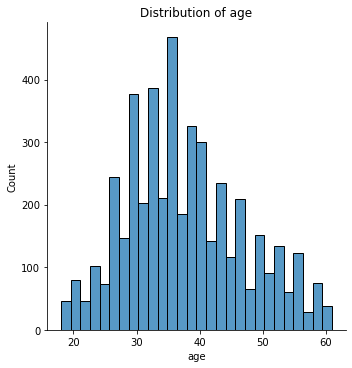

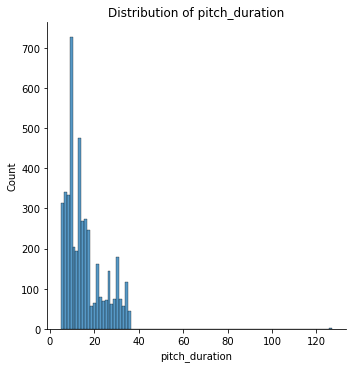

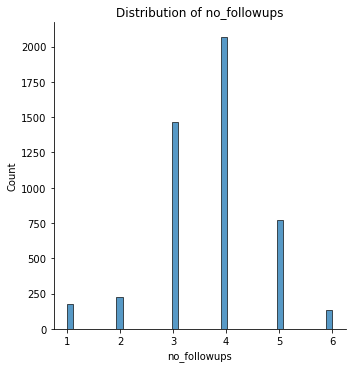

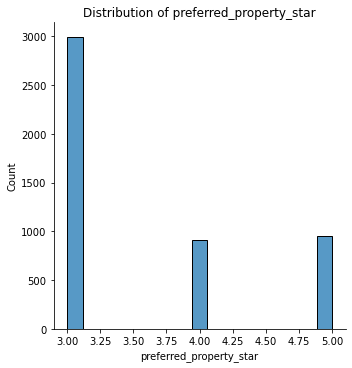

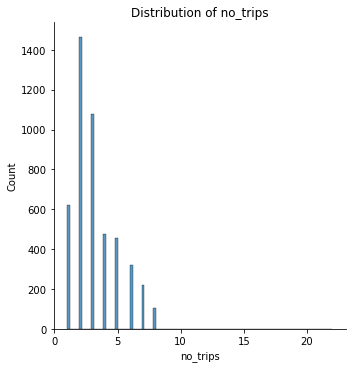

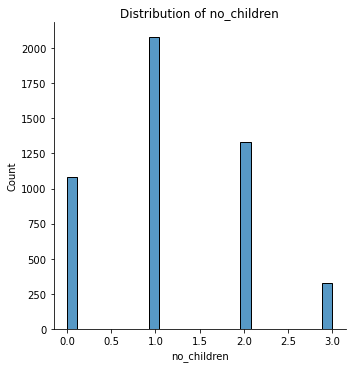

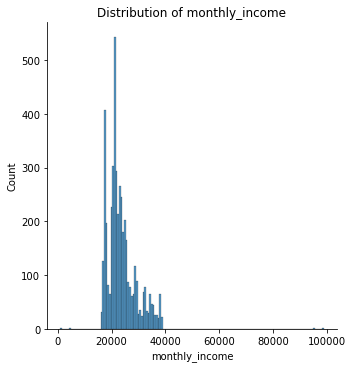

In [21]:
# visualize the distribution of columns to get an idea of if/how we might impute them

for i in null_list:
    sns.displot(df, x=i)
    plt.title('Distribution of '+i)
    plt.show();

**Takeaways:**
- pitch_duration, no_trips, monthly income all appear to have some outliers
    - we could address by either removing them, scaling the data (robust scaler is best), or 

In [9]:
def get_lower_and_upper_bounds(df, k=1.5):
    '''
    calculates the lower and upper bound to locate outliers and displays them
    note: recommended k be 1.5
    '''
    for i in df.columns:
        if df[i].dtypes != 'object':
            quartile1, quartile3 = np.percentile(df[i], [25,75])
            IQR_value = quartile3 - quartile1
            lower_bound = (quartile1 - (k * IQR_value))
            upper_bound = (quartile3 + (k * IQR_value))
            print(f'For {i} the lower bound is {lower_bound} and  upper bound is {upper_bound}')
        
        
        
def visualize_get_lower_and_upper_bounds(df, k=1.5):
    '''
    calculates the lower and upper bound to locate outliers and displays them
    note: recommended k be 1.5
    '''
    for i in df.columns:
        if df[i].dtypes != 'object':
            quartile1, quartile3 = np.percentile(df[i], [25,75])
            IQR_value = quartile3 - quartile1
            lower_bound = (quartile1 - (k * IQR_value))
            upper_bound = (quartile3 + (k * IQR_value))
            print(f'For {i} the lower bound is {lower_bound} and  upper bound is {upper_bound}')
            
            # get those visualizations going
            plt.figure(figsize=(16,4))
            plt.subplot(1, 2, 1)
            sns.histplot(data = df, x = df[i], kde=True)
            plt.title(i)
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[i], data=df, whis=k)
            plt.title(i)
            plt.show()

In [10]:
df.pitch_duration

0        6.0
1       14.0
2        8.0
3        9.0
4        8.0
        ... 
4883     9.0
4884    31.0
4885    17.0
4886    16.0
4887    14.0
Name: pitch_duration, Length: 4888, dtype: float64

In [11]:
quartile1, quartile3 = np.percentile(df.pitch_duration, [25,75])
IQR_value = quartile3 - quartile1
lower_bound = (quartile1 - (1.5 * IQR_value))
upper_bound = (quartile3 + (1.5 * IQR_value))
print(f'For pitch duration the lower bound is {lower_bound} and  upper bound is {upper_bound}')

print(quartile1, quartile3, IQR_value)

np.percentile(df.pitch_duration, 25)

For pitch duration the lower bound is nan and  upper bound is nan
nan nan nan


nan

In [12]:
df.pitch_duration

0        6.0
1       14.0
2        8.0
3        9.0
4        8.0
        ... 
4883     9.0
4884    31.0
4885    17.0
4886    16.0
4887    14.0
Name: pitch_duration, Length: 4888, dtype: float64

In [13]:
get_lower_and_upper_bounds(df, k=1.5)

For cust_id the lower bound is 197556.5 and  upper bound is 207330.5
For product_taken the lower bound is 0.0 and  upper bound is 0.0
For age the lower bound is nan and  upper bound is nan
For city_tier the lower bound is -2.0 and  upper bound is 6.0
For pitch_duration the lower bound is nan and  upper bound is nan
For group_size the lower bound is 0.5 and  upper bound is 4.5
For no_followups the lower bound is nan and  upper bound is nan
For preferred_property_star the lower bound is nan and  upper bound is nan
For no_trips the lower bound is nan and  upper bound is nan
For passport the lower bound is -1.5 and  upper bound is 2.5
For pitch_sat_score the lower bound is -1.0 and  upper bound is 7.0
For has_car the lower bound is -1.5 and  upper bound is 2.5
For no_children the lower bound is nan and  upper bound is nan
For monthly_income the lower bound is nan and  upper bound is nan


For cust_id the lower bound is 197556.5 and  upper bound is 207330.5


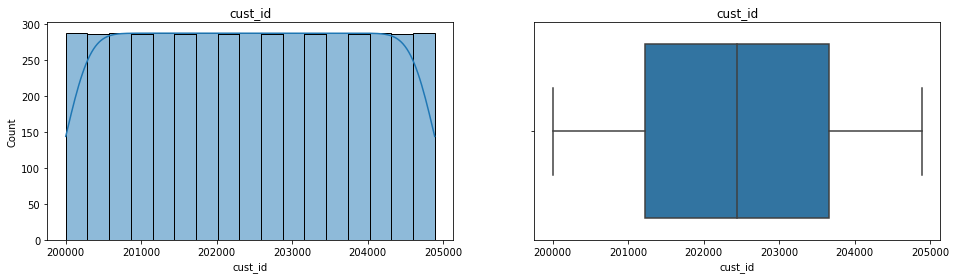

For product_taken the lower bound is 0.0 and  upper bound is 0.0


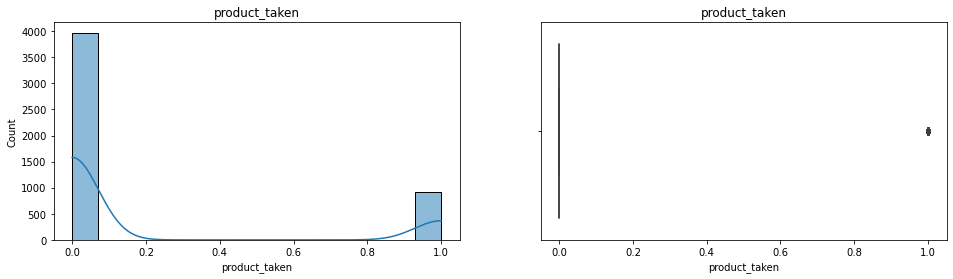

For age the lower bound is nan and  upper bound is nan


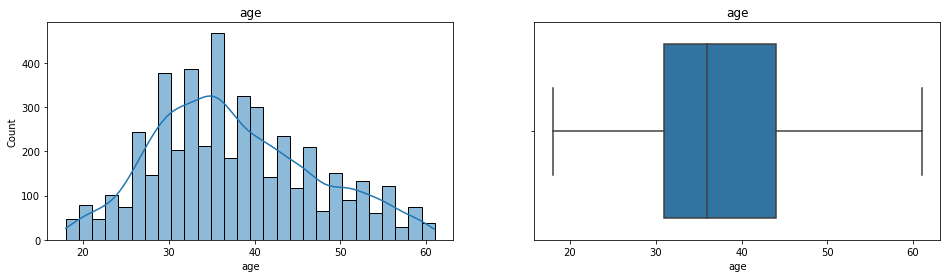

For city_tier the lower bound is -2.0 and  upper bound is 6.0


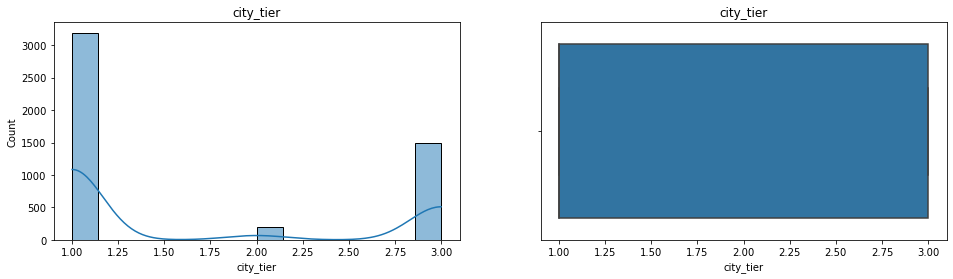

For pitch_duration the lower bound is nan and  upper bound is nan


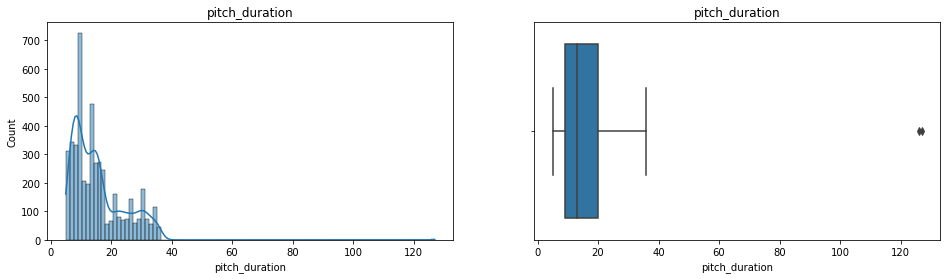

For group_size the lower bound is 0.5 and  upper bound is 4.5


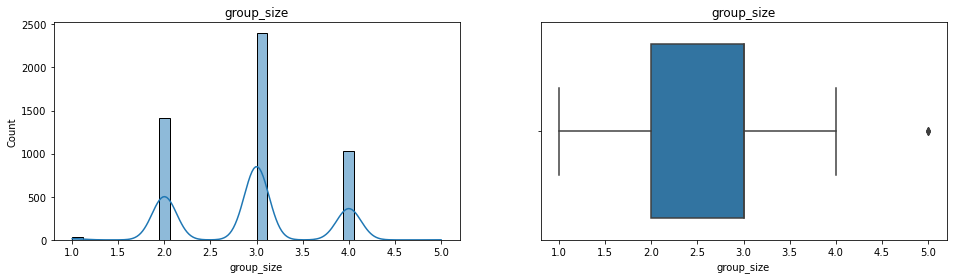

For no_followups the lower bound is nan and  upper bound is nan


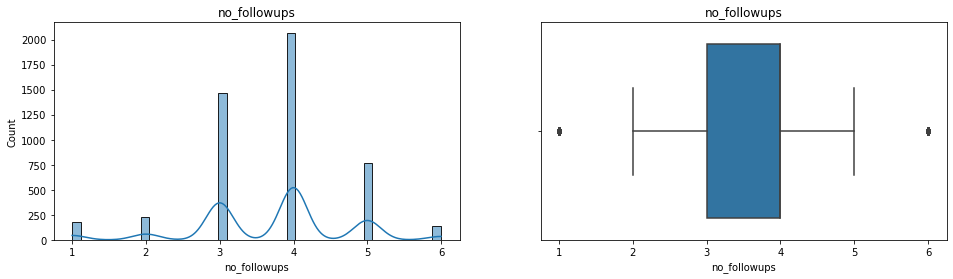

For preferred_property_star the lower bound is nan and  upper bound is nan


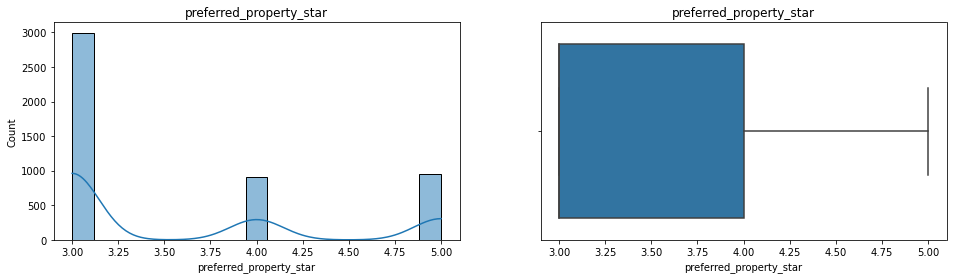

For no_trips the lower bound is nan and  upper bound is nan


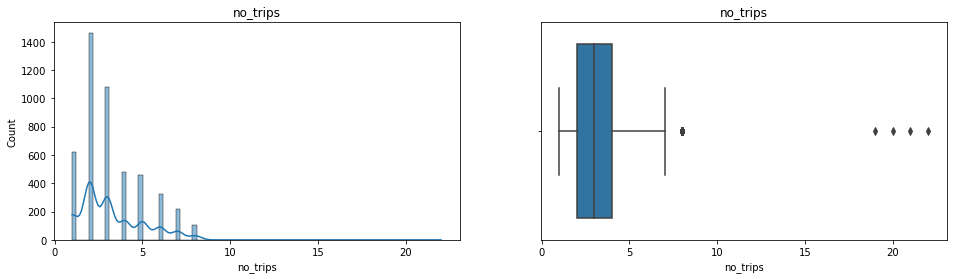

For passport the lower bound is -1.5 and  upper bound is 2.5


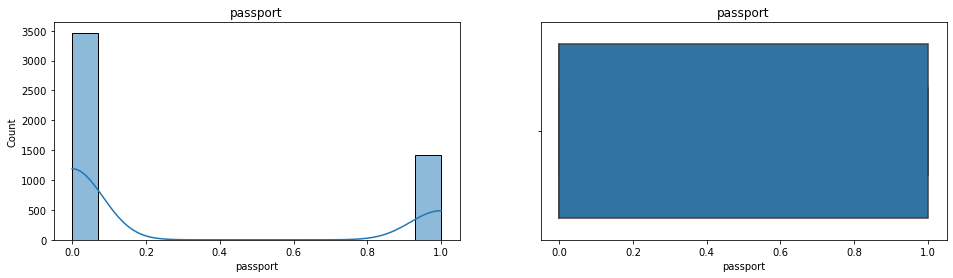

For pitch_sat_score the lower bound is -1.0 and  upper bound is 7.0


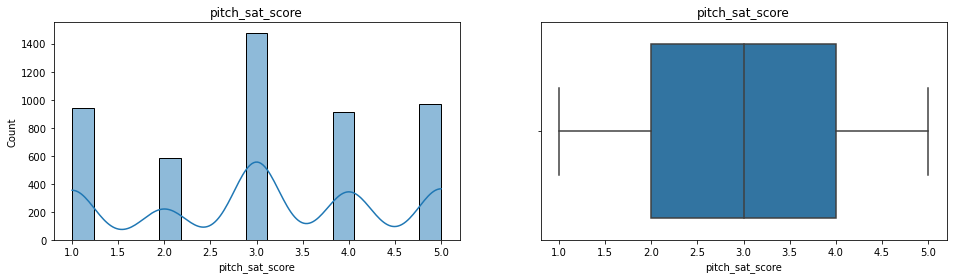

For has_car the lower bound is -1.5 and  upper bound is 2.5


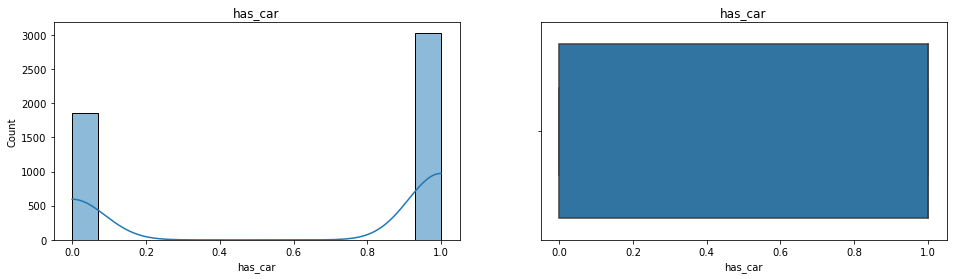

For no_children the lower bound is nan and  upper bound is nan


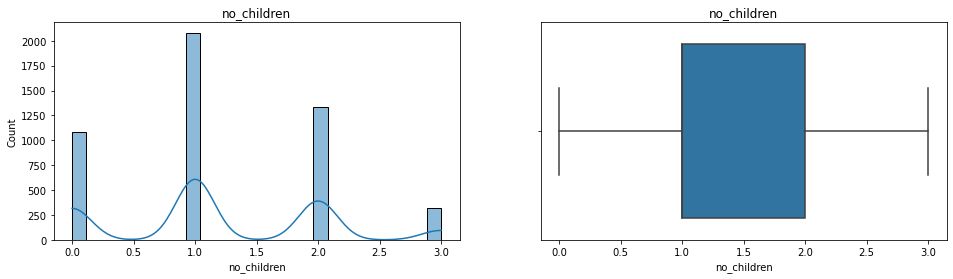

For monthly_income the lower bound is nan and  upper bound is nan


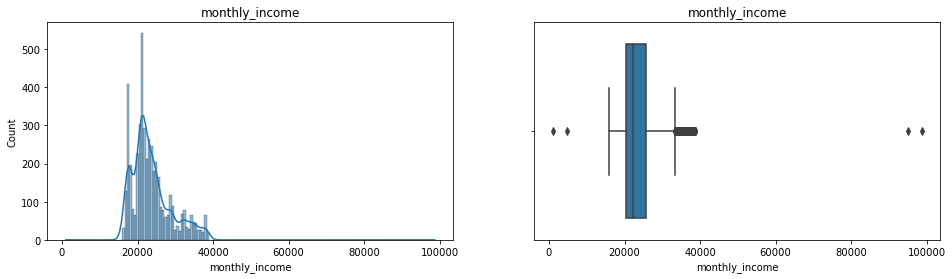

In [14]:
# use visualize outlier function to gauge outliers
visualize_get_lower_and_upper_bounds(df, k=1.5)

**Columns with outliers:** \
    - monthly_income\
    - no_followsup\
    - no_trips\
    - group_size\
    - pitch_duration

For monthly_income the lower bound is nan and  upper bound is nan


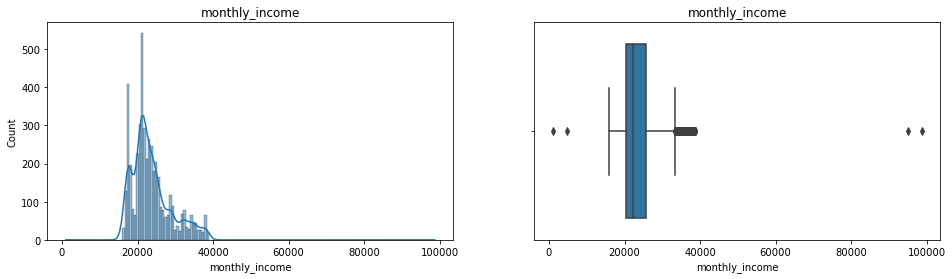

For no_followups the lower bound is nan and  upper bound is nan


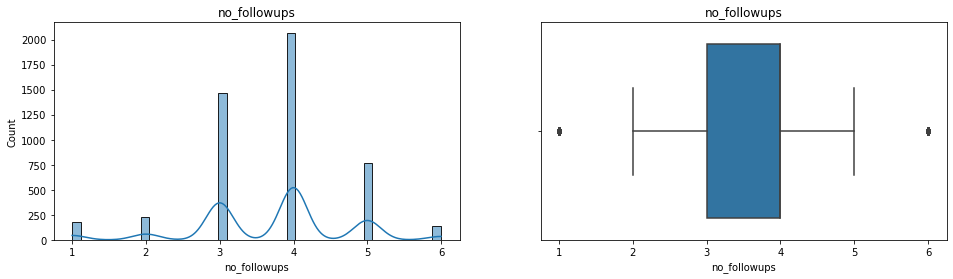

For no_trips the lower bound is nan and  upper bound is nan


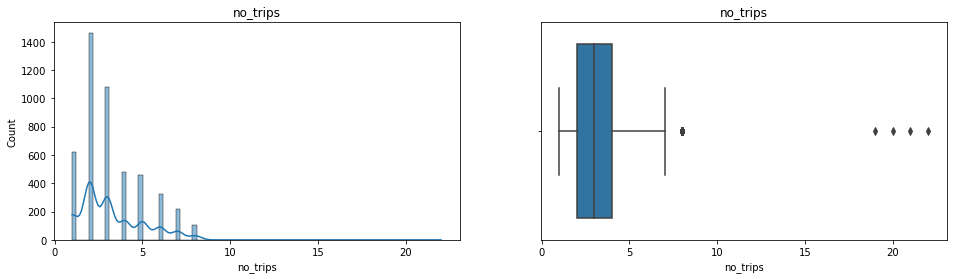

For group_size the lower bound is 0.5 and  upper bound is 4.5


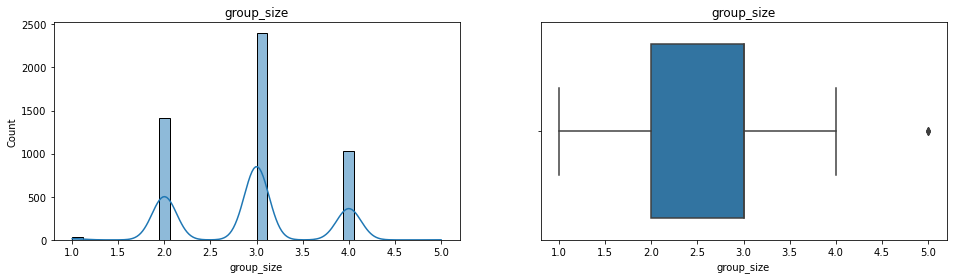

For pitch_duration the lower bound is nan and  upper bound is nan


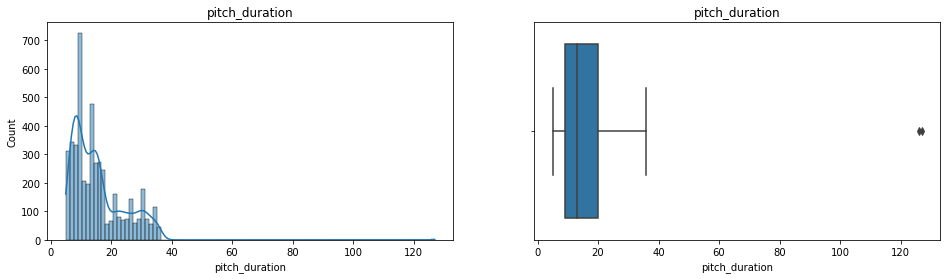

In [15]:
# dive into columns with outliers
outliers = ['monthly_income', 'no_followups', 'no_trips', 'group_size', 'pitch_duration']

visualize_get_lower_and_upper_bounds(df[outliers], k=1.5)

In [16]:
# let's take a look at the specific anomalies
# monthly income anomaly
df[df.monthly_income>50000]

,cust_id,product_taken,age,contact_type,city_tier,pitch_duration,occupation,gender,group_size,no_followups,product_pitched,preferred_property_star,marital_status,no_trips,passport,pitch_sat_score,has_car,no_children,designation,monthly_income
38,200038,0,36.0,Self Inquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,202482,0,37.0,Self Inquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


In [17]:
df[(df.no_followups>5) | (df.no_followups<2)].no_followups.value_counts()

1.0    176
6.0    136
Name: no_followups, dtype: int64

In [18]:
df[df.no_trips>=7].no_trips.value_counts()

7.0     218
8.0     105
20.0      1
19.0      1
21.0      1
22.0      1
Name: no_trips, dtype: int64

In [19]:
df.isnull().sum()

cust_id                      0
product_taken                0
age                        226
contact_type                 0
city_tier                    0
pitch_duration             251
occupation                   0
gender                       0
group_size                   0
no_followups                45
product_pitched              0
preferred_property_star     26
marital_status               0
no_trips                   140
passport                     0
pitch_sat_score              0
has_car                      0
no_children                 66
designation                  0
monthly_income             233
dtype: int64

In [20]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [21]:
missing_values_table(df)

Your selected dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
pitch_duration,251,5.1
monthly_income,233,4.8
age,226,4.6
no_trips,140,2.9
no_children,66,1.4
no_followups,45,0.9
preferred_property_star,26,0.5


In [22]:
# why are the columns printing out weird
# I suspect there may be some trailing spaces
df.columns

Index(['cust_id', 'product_taken', 'age', 'contact_type', 'city_tier',
       'pitch_duration', 'occupation', 'gender', 'group_size', 'no_followups',
       'product_pitched', 'preferred_property_star', 'marital_status',
       'no_trips', 'passport', 'pitch_sat_score', 'has_car', 'no_children',
       'designation', 'monthly_income'],
      dtype='object')

In [23]:
df.columns.tolist()

['cust_id',
 'product_taken',
 'age',
 'contact_type',
 'city_tier',
 'pitch_duration',
 'occupation',
 'gender',
 'group_size',
 'no_followups',
 'product_pitched',
 'preferred_property_star',
 'marital_status',
 'no_trips',
 'passport',
 'pitch_sat_score',
 'has_car',
 'no_children',
 'designation',
 'monthly_income']

In [24]:
for i in df.columns:
    df[i] = df[i.strip()]

In [25]:
df.columns = df.columns.str.replace(' ', '')

In [26]:
df.columns

Index(['cust_id', 'product_taken', 'age', 'contact_type', 'city_tier',
       'pitch_duration', 'occupation', 'gender', 'group_size', 'no_followups',
       'product_pitched', 'preferred_property_star', 'marital_status',
       'no_trips', 'passport', 'pitch_sat_score', 'has_car', 'no_children',
       'designation', 'monthly_income'],
      dtype='object')

In [27]:
df.head()

,cust_id,product_taken,age,contact_type,city_tier,pitch_duration,occupation,gender,group_size,no_followups,product_pitched,preferred_property_star,marital_status,no_trips,passport,pitch_sat_score,has_car,no_children,designation,monthly_income
0,200000,1,41.0,Self Inquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Self Inquiry,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Inquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Self Inquiry,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Inquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


**Analyze Nulls**

In [28]:
df.isnull().sum()

cust_id                      0
product_taken                0
age                        226
contact_type                 0
city_tier                    0
pitch_duration             251
occupation                   0
gender                       0
group_size                   0
no_followups                45
product_pitched              0
preferred_property_star     26
marital_status               0
no_trips                   140
passport                     0
pitch_sat_score              0
has_car                      0
no_children                 66
designation                  0
monthly_income             233
dtype: int64

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


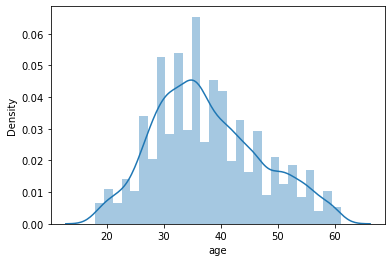

In [29]:
sns.distplot(df.age);

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


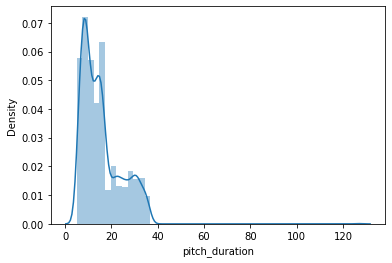

In [30]:
sns.distplot(df.pitch_duration);